<h2>Task 1:</h2>

This assignment is for visualization using matplotlib:<br>
data to use: url= https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv <br />
titanic = pd.read_csv(url)

In [55]:
import pandas as pd
url = "https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic = pd.read_csv(url)
titanic.head() # Read first 5 rows of the data set

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


<h3>Charts to plot:</h3>

<b>1. Create a pie chart presenting the male/female proportion</b>

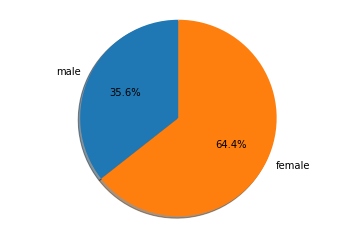

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

labels =["male","female"] #Creating a list of labels
sizes =[titanic[titanic["sex"]=='female'].count()['sex'],titanic[titanic["sex"]=='male'].count()['sex']]
fig1,ax1= plt.subplots()
ax1.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90) 
ax1.axis('equal') #draws pie chart as given 'equal' aspect ratio
plt.show()

<b>2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender</b>

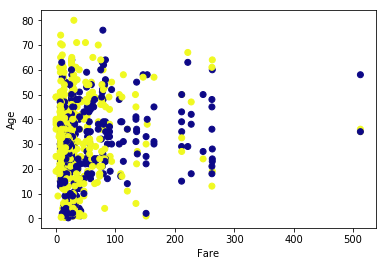

In [57]:
titanic.dropna(subset=["sex"],inplace=True) #delete all the rows where values of 'sex' column is missing
plt.scatter(x='fare',y='age',c=titanic["sex"]=="male",cmap='plasma',data=titanic) #scatter plot with plasma color map 
plt.xlabel("Fare") #set x - label
plt.ylabel("Age") #set y - label
plt.show()

<h2>Task 2:</h2>

It happens all the time: someone gives you data containing malformed strings, Python, lists and missing data.<br/>
How do you tidy it up so you can get on with the analysis?<br/><br />
Take this monstrosity as the DataFrame to use in the following puzzles:<br /><br/>
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm','Budapest_PaRis', 'Brussels_londOn'],'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]], 'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', '12. Air France', '"Swiss Air"']})

In [58]:
import numpy as np
df = pd.DataFrame({'From_To':['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm','Budapest_PaRis', 'Brussels_londOn'],'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],'Airline': ['KLM(!)', ' (12)', '(British Airways. )', '12. Air France', '"Swiss Air"']})
df #print dataframe

,Airline,FlightNumber,From_To,RecentDelays
0,KLM(!),10045.0,LoNDon_paris,"[23, 47]"
1,(12),NaN,MAdrid_miLAN,[]
2,(British Airways. ),10065.0,londON_StockhOlm,"[24, 43, 87]"
3,12. Air France,NaN,Budapest_PaRis,[13]
4,"""Swiss Air""",10085.0,Brussels_londOn,"[67, 32]"


<b>1. Some values in the the FlightNumber column are missing. These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing numbers and make the column an integer column (instead of a float column).</b>

In [59]:
df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int) #"FlightNumber" column values increases by 10 and makes column an integer column
df

,Airline,FlightNumber,From_To,RecentDelays
0,KLM(!),10045,LoNDon_paris,"[23, 47]"
1,(12),10055,MAdrid_miLAN,[]
2,(British Airways. ),10065,londON_StockhOlm,"[24, 43, 87]"
3,12. Air France,10075,Budapest_PaRis,[13]
4,"""Swiss Air""",10085,Brussels_londOn,"[67, 32]"


In [60]:
df['FlightNumber'].dtype #To verify the datatype of FlightNumber column

dtype('int32')

<b>2. The FromTo column would be better as two separate columns! Split each string on the underscore delimiter to give a new temporary DataFrame with the correct values. Assign the correct column names to this temporary DataFrame.</b>

In [61]:
temp_df = df["From_To"].str.split('_', expand=True) #split each string by '_' in 'From_To' column of df and assigns to temporary_df
temp_df.columns = ['From', 'To'] #creates new columns 'From' and 'To'
temp_df #print new df

,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


<b>3. Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame. Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".)</b>

In [62]:
temp_df['From'] = temp_df['From'].str.capitalize() 
temp_df['To'] = temp_df['To'].str.capitalize()
temp_df

,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


<b>4. Delete the From_To column from df and attach the temporary DataFrame from the previous questions.</b>

In [63]:
df.drop('From_To', axis=1, inplace = True) #delete'From_To' column from dataframe
df = df.join(temp_df) #attach temp_df to df
df

,Airline,FlightNumber,RecentDelays,From,To
0,KLM(!),10045,"[23, 47]",London,Paris
1,(12),10055,[],Madrid,Milan
2,(British Airways. ),10065,"[24, 43, 87]",London,Stockholm
3,12. Air France,10075,[13],Budapest,Paris
4,"""Swiss Air""",10085,"[67, 32]",Brussels,London


<b>5. In the RecentDelays column, the values have been entered into the DataFrame as a list. We would like each first value in its own column, each second value in its own column, and so on. If there isn't an Nth value, the value should be NaN. Expand the Series of lists into a DataFrame named delays, rename the columns delay_1, delay_2, etc. and replace the unwanted RecentDelays column in df with delays.</b>

In [64]:
delay_series = df['RecentDelays'].apply(pd.Series) 
delay_series.columns = ['delay_{}'.format(i) for i in range(1, len(delay_series.columns)+1)] #set delay_series columns title
df = df.drop('RecentDelays', axis=1).join(delay_series) #deletes 'RecentDelays' column and joins with delay_series columns 
df

,Airline,FlightNumber,From,To,delay_1,delay_2,delay_3
0,KLM(!),10045,London,Paris,23.0,47.0,NaN
1,(12),10055,Madrid,Milan,NaN,NaN,NaN
2,(British Airways. ),10065,London,Stockholm,24.0,43.0,87.0
3,12. Air France,10075,Budapest,Paris,13.0,NaN,NaN
4,"""Swiss Air""",10085,Brussels,London,67.0,32.0,NaN
